# Project: Investigate The Movie Database (TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#rq1">Question 1</a></li>
<li><a href="#rq2">Question 2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chose to investigate the TMDb (The Movie Database) dataset, as this is the one which I have the most previous knowledge and interest in. The database includes information on over 10,000 movies, including details such as the cast and the budget.

This Jupyter notebook was created with **python version 2.7.15**.

#Hide code from displayed notebook cell **(changed to markdown so does not run)**
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#import locale
#locale.setlocale(locale.LC_ALL, '')     #set python local to the system (UK in my case) when looking at US dates in dataset

<a id='wrangling'></a>
## Data Wrangling

First of all I will load the csv (Comma Separated Values) dataset into pandas, before looking at the start and end of the dataset.

### General Properties

In [2]:
tmdb = pd.read_csv("tmdb-movies.csv")       #load data
tmdb.head                                   #output the start and end of the data

<bound method DataFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt239542

Looking at the '.head' data, it can be seen that the budget and revenue data is missing for older films, but as this data may be usefull, it is worth keeping the data series.
The homepage, tagline, keywords and overview columns are long columns which are unlikely to provide usable data, so I plan to drop these to make the table easier to read. I am also unlikely to use the imdb_id column, so this will also be dropped. I will also output the first row of data to see a clearer samle of the headings and respective data.

>Note - Only run this cell once, otherwise you will get an error as it tries to delete the columns again.
### Data Cleaning

In [8]:
del tmdb['homepage']                        #only run this cell once
del tmdb['tagline']
del tmdb['keywords']
del tmdb['overview']
del tmdb['imdb_id']

In [9]:
print tmdb.iloc[0]                          #print column names and first row (0)

id                                                                   6643
popularity                                                       0.421043
budget                                                                  0
revenue                                                                 0
original_title                                             The Unforgiven
cast                    Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...
director                                                      John Huston
runtime                                                               125
genres                                               Action|Drama|Western
production_companies                                    James Productions
release_date                                          1960-01-01 00:00:00
vote_count                                                             17
vote_average                                                          4.9
release_year                          

The cast, genres and production_companies look like interesting datasets to probe, so I am going to add total counts of the data in these columns to 3 new columns.
First of all I need to check for any empty series, as I will be adding 1 to the count of '|' characters, which will only be present when there is more that one item.


In [10]:
print 'Cast length:', len(tmdb['cast'])
print 'Genres length:', len(tmdb['genres'])
print 'Production companies length:', len(tmdb['production_companies'])

Cast length: 10866
Genres length: 10866
Production companies length: 10866


Then I count the separators and add one column to the dataset for the count of items in each series.

>Note - Only run this cell once, otherwise you will get an error as it tries to create the columns again.

In [3]:
tmdb['cast_count'] = (tmdb['cast'].str.count('\|')) + 1    #only run this cell once
tmdb['genre_count'] = (tmdb['genres'].str.count('\|')) + 1
tmdb['companies_count'] = (tmdb['production_companies'].str.count('\|')) + 1

Again print the first datapoint and the '.dtypes' statistics for the dataset.

In [11]:
print tmdb.iloc[0]
print tmdb.dtypes

id                                                                   6643
popularity                                                       0.421043
budget                                                                  0
revenue                                                                 0
original_title                                             The Unforgiven
cast                    Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...
director                                                      John Huston
runtime                                                               125
genres                                               Action|Drama|Western
production_companies                                    James Productions
release_date                                          1960-01-01 00:00:00
vote_count                                                             17
vote_average                                                          4.9
release_year                          

Now change the data types in the data frame, to their respective data types - integers, floats and dates.


In [5]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

tmdb['budget_adj'] = tmdb['budget_adj'].apply(parse_maybe_int)
tmdb['revenue_adj'] = tmdb['revenue_adj'].apply(parse_maybe_int)

print tmdb['budget_adj'].head
print tmdb['revenue_adj'].head

<bound method Series.head of 0        137999939
1        137999939
2        101199955
3        183999919
4        174799923
5        124199945
6        142599937
7         99359956
8         68079970
9        160999929
10       225399900
11       161919931
12        13799993
13        80959964
14       257599886
15        40479982
16        44159980
17       119599947
18        87399961
19       147199935
20       174799923
21        27599987
22       101199955
23        36799983
24        25759988
25       137999939
26        62559972
27        74519967
28        18399991
29        56119975
           ...    
10836            0
10837            0
10838            0
10839            0
10840            0
10841       503851
10842            0
10843            0
10844            0
10845            0
10846            0
10847            0
10848     34362645
10849            0
10850            0
10851            0
10852            0
10853            0
10854            0
10855      4702610
10

Note the dates are in US format - months/days/years

Default 2digit dates in python for 19xx are from 1969, so we will need to change the dates before 1969, from 2066, 2067 & 2068 to 1966, 1967 & 1968 respectively. As the dates are in the range 1966 to 2015, I know all dates after 2015 should infact begin with 19xx, so I will subtract 100 years off of all dates with a year greater than today (2018).

In [6]:
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.datetime.strptime(date, '%m/%d/%y')
    
def parse_pre69(date1):
    if date1.year > 2018:
        return date1.replace(year=date1.year-100)
    else:
        return date1

tmdb['release_date'] = tmdb['release_date'].apply(parse_date)
tmdb['release_date'] = tmdb['release_date'].apply(parse_pre69)

print tmdb['release_date'].head
print tmdb['release_year'].head

<bound method Series.head of 0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
18      2015-03-12
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2015-11-06
29      2015-09-09
           ...    
10836   1966-01-01
10837   1966-06-21
10838   1966-11-01
10839   1966-10-27
10840   1966-12-22
10841   1966-10-23
10842   1966-01-01
10843   1966-06-09
10844   1966-01-16
10845   1966-03-01
10846   1966-01-09
10847   1966-06-20
10848   1966-08-24
10849   1966-12-16
10850   1966-02-23
10851   1966-06-22
10852   1966-05-31
10853   1966-03-29
10854   1966-02-17
10855   1966-01-20
10

I then sorted the dataset in date format, before then displaying the start and end of the datset, to ensure that I parsed all of the dates correctly.

In [7]:
tmdb = tmdb.sort_values(by=['release_date'], ascending=True)
print tmdb.head 

<bound method DataFrame.head of            id    imdb_id  popularity     budget     revenue  \
10150    6643  tt0054428    0.421043          0           0   
10152   23220  tt0053677    0.333643          0           0   
10162   18780  tt0054310    0.194948          0           0   
10166   21240  tt0053699    0.136525          0           0   
10156    1673  tt0053729    0.267118          0           0   
10172    1941  tt0053804    0.256779          0           0   
10147   11167  tt0054167    0.569424          0           0   
10155   43040  tt0054292    0.269428          0           0   
10158   31102  tt0054195    0.254124          0           0   
10144     284  tt0053604    0.947307    3000000    25000000   
10165   22013  tt0053793    0.138777          0           0   
10153   23439  tt0053925    0.323180     270000           0   
10163    1908  tt0053946    0.162753          0           0   
10167   11773  tt0054443    0.127219     200000           0   
10164    2982  tt005403

Finally I use the pandas .describe function, to see the statistics of the data in each of the columns.

In [13]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_count,genre_count,companies_count
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10790.000000,10843.000000,9836.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,4.872382,2.486397,2.361427
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,0.584604,1.115649,1.343804
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,5.000000,2.000000,1.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,5.000000,2.000000,2.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,5.000000,3.000000,3.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,5.000000,5.000000,5.000000


<a id='eda'></a>
## Exploratory Data Analysis

<a id='rq1'></a>
### Research Question 1 - Do movie stars move to bigger budget films as their career progresses?

As movie stars progress in their career, they normally take on more major parts in big films. I plan to see if there is an increase in the budget of the films over the top 20 stars careers. With the number of actors for each film restrcted to 5, parts of an actors career will not show in the statistics. I will need to compare this first to the inflation adjusted budget of the film, and then also the takings of the film, as a high takings to budget ratio may show when an actor has made the film more money, which then enabled then to claim a higher wage.

First of all I will separate all of the actors out into a separate data frame, before then combining into a single list, to see who the top 20 actors are.

In [16]:
actorsdf = tmdb['cast'].str.split('|', expand=True).rename(columns = lambda x:"actor"+str(x+1))
#lambda x: "string"+str(x+1)
print 'Actors from oldest film:', actorsdf.iloc[0]
print 'Start and end of Actors dataframe:', actorsdf.head

Actors from oldest film: actor1    Burt Lancaster
actor2    Audrey Hepburn
actor3      Audie Murphy
actor4        John Saxon
actor5      Lillian Gish
Name: 10150, dtype: object
Start and end of Actors dataframe: <bound method DataFrame.head of                      actor1              actor2                actor3  \
10150        Burt Lancaster      Audrey Hepburn          Audie Murphy   
10152         Peter Cushing        Martita Hunt        Yvonne Monlaur   
10162          Kenneth More         Dana Wynter          Carl MÃ¶hner   
10166        Kenneth Connor     Charles Hawtrey             Sid James   
10156        Randolph Scott         Nancy Gates          Skip Homeier   
10172           Paul Newman     Eva Marie Saint           Lee J. Cobb   
10147       Karlheinz BÃ¶hm       Moira Shearer           Anna Massey   
10155        Jeffrey Hunter        Woody Strode      Constance Towers   
10158          Hayley Mills          Jane Wyman          Richard Egan   
10144           Jack Lemmo

In [28]:
single_list = pd.concat([actorsdf['actor1'],actorsdf['actor2'],actorsdf['actor3'],actorsdf['actor4'],actorsdf['actor5']], ignore_index=True)
print 'Single list length:', len(single_list)
print 'Start and end of single list:', single_list.head

Single list length: 54330
Start and end of single list: <bound method Series.head of 0          Burt Lancaster
1           Peter Cushing
2            Kenneth More
3          Kenneth Connor
4          Randolph Scott
5             Paul Newman
6         Karlheinz BÃ¶hm
7          Jeffrey Hunter
8            Hayley Mills
9             Jack Lemmon
10         Burt Lancaster
11          Vincent Price
12          Spencer Tracy
13         George Sanders
14         Michael Rennie
15            Jerry Lewis
16        Charles Herbert
17          Frank Sinatra
18        Anthony Perkins
19             Rod Taylor
20          Albert Finney
21        Christopher Lee
22          Jackie Joseph
23           Kirk Douglas
24         Marilyn Monroe
25              Doris Day
26            Yul Brynner
27             John Wayne
28            Jerry Lewis
29          Elvis Presley
               ...       
54300        Michael Cera
54301     Douglas Rankine
54302       Doris Roberts
54303          Tony Perez
54304

Then I will create a list with the total count of each actor appearing in the dataset.

In [24]:
sorted_list = single_list.value_counts()
sorted_list = sorted_list.rename_axis('Actor').reset_index(name='Count')
print 'Actors list length:', len(sorted_list)
print 'Start and end of Top Actors:', sorted_list.head

Actors list length: 19026
Top 20 Actors: <bound method DataFrame.head of                       Actor  Count
0            Robert De Niro     72
1         Samuel L. Jackson     71
2              Bruce Willis     62
3              Nicolas Cage     61
4             Michael Caine     53
5            Robin Williams     51
6               John Cusack     50
7            Morgan Freeman     49
8              John Goodman     49
9               Liam Neeson     48
10           Susan Sarandon     48
11           Julianne Moore     47
12             Alec Baldwin     47
13       Christopher Walken     46
14                Tom Hanks     46
15              Johnny Depp     46
16             Gene Hackman     46
17       Sylvester Stallone     45
18             Willem Dafoe     45
19             Dennis Quaid     45
20        Donald Sutherland     44
21           Clint Eastwood     44
22             Meryl Streep     44
23                Ed Harris     44
24            Ewan McGregor     43
25         Antoni

Then I will plot this list as a histogram to see if there is a good spread of data.

(array([1.7781e+04, 6.9100e+02, 2.7500e+02, 1.3800e+02, 7.8000e+01,
        3.9000e+01, 1.8000e+01, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

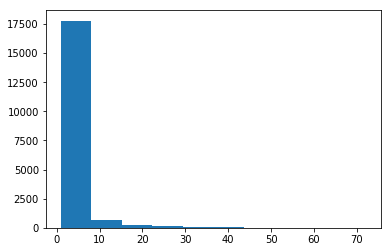

In [31]:
plt.hist(sorted_list['Count'])

As the majority of actors have appeared in less than 10 films (as a top 5 actor), I will create a shorter list containing just the top 20 actors, so that I the most data for each actor to compare against one another.
I will also plot another histogram for these top 20 actors.

                 Actor  Count
0       Robert De Niro     72
1    Samuel L. Jackson     71
2         Bruce Willis     62
3         Nicolas Cage     61
4        Michael Caine     53
5       Robin Williams     51
6          John Cusack     50
7       Morgan Freeman     49
8         John Goodman     49
9          Liam Neeson     48
10      Susan Sarandon     48
11      Julianne Moore     47
12        Alec Baldwin     47
13  Christopher Walken     46
14           Tom Hanks     46
15         Johnny Depp     46
16        Gene Hackman     46
17  Sylvester Stallone     45
18        Willem Dafoe     45
19        Dennis Quaid     45


(array([9., 5., 2., 0., 0., 1., 1., 0., 0., 2.]),
 array([45. , 47.7, 50.4, 53.1, 55.8, 58.5, 61.2, 63.9, 66.6, 69.3, 72. ]),
 <a list of 10 Patch objects>)

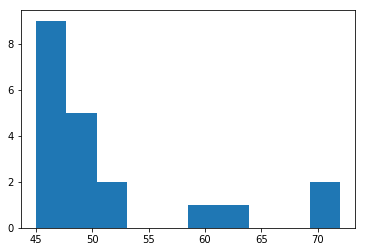

In [32]:
short_list = sorted_list.head(20)
print short_list
plt.hist(short_list['Count'])

for short list inside cast
check cast against short list


In [ ]:
print short_list.head

In [ ]:
def parse_budget(budget):
    if budget > 100:
        return budget

In [ ]:
def top20_graph(i):
    g = 'g'+str(i)
    g = tmdb[tmdb['cast'].str.contains(short_list['Actor'].iloc[i])==True]
    del g['id']
    del g['popularity']
    del g['budget']
    del g['revenue']
    del g['director']
    del g['runtime']
    del g['genres']
    del g['production_companies']
    del g['vote_count']
    del g['vote_average']
    del g['release_year']
    del g['cast_count']
    del g['genre_count']
    del g['companies_count']
    del g['cast']
    del g['revenue_adj']
    del g['original_title']
    g = g.set_index(['release_date'])
    g = g['budget_adj'].apply(parse_budget)
    g = g.dropna()
    print 'Graph for Actor:', short_list['Actor'].iloc[i]
    print 'Top Actor Number:', i+1
    print 'Was a top 5 Actor in:', short_list['Count'].iloc[i], 'films'
    print 'Number of plotted films:', len(g)
    plt.plot(g, 'ro')

In [ ]:
top20_graph(0)

In [ ]:
top20_graph(1)

In [ ]:
top20_graph(2)

In [ ]:
top20_graph(3)

In [ ]:
top20_graph(4)

In [ ]:
top20_graph(5)

In [ ]:
top20_graph(6)

In [ ]:
top20_graph(7)

In [ ]:
top20_graph(8)

In [ ]:
top20_graph(9)

<a id='rq2'></a>
### Research Question 2  (Replace this header name!)

# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

groupby genre
NumParts = df_mast.groupby('Colour')['Length'].count()
Median = df_mast.groupby('Colour')['Length'].median()
Inter = df_mast.groupby('Colour')['Length'].quantile(0.75) - df_mast.groupby('Colour')['Length'].quantile(0.25)
Toler = df_mast.groupby('Colour')['Tol'].sum()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [ ]:
print tmdb.iloc[0]

def vote_graph(i):
    g = 'g'+str(i)
    g = tmdb[tmdb['cast'].str.contains(short_list['Actor'].iloc[i])==True]
    del g['id']
    del g['popularity']
    del g['budget']
    del g['revenue']
    del g['director']
    del g['runtime']
    del g['genres']
    del g['production_companies']
    del g['vote_count']
    del g['vote_average']
    del g['release_year']
    del g['cast_count']
    del g['genre_count']
    del g['companies_count']
    del g['cast']
    del g['revenue_adj']
    del g['original_title']
    g = g.set_index(['release_date'])
    g = g['budget_adj'].apply(parse_budget)
    g = g.dropna()
    print 'Graph for Actor:', short_list['Actor'].iloc[i]
    print 'Top Actor Number:', i+1
    print 'Was a top 5 Actor in:', short_list['Count'].iloc[i], 'films'
    print 'Number of plotted films:', len(g)
    plt.plot(g, 'ro')

Is the TMDb popularity linked to the revenue taken by the film

vote_avg vs revenue_adj

In [ ]:
rev = tmdb[tmdb['revenue_adj']>100]
print len(rev)

In [ ]:
print rev.iloc[0]

In [ ]:
ra = rev['revenue_adj']
va = rev['vote_average']
vc = rev['vote_count']
po = rev['popularity']

plt.scatter(ra,va)

In [ ]:
plt.scatter(ra,vc)

In [ ]:
plt.scatter(va,vc)

In [ ]:
plt.scatter(ra,po)

In [ ]:
plt.scatter(va,po)